In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
from eegmodels.EEGModels import EEGNet, ShallowConvNet, DeepConvNet
import tensorflow as tf
from numpy import argmax
import seaborn as sn
import math
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Masking
import sklearn
from sklearn.preprocessing import normalize
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import multi_gpu_model
from multiprocessing import Pool
import h5py
import tensorflow.keras as keras
import pickle
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.keras import backend as K
import seaborn as sns
from tensorflow.keras.utils import to_categorical
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# if len(physical_devices) > 0:
#        tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(device_lib.list_local_devices()) # list of DeviceAttributes
import pandas as pd
# %gui qt
import numpy as np
# import mne
import pickle
import sys
import os
import matplotlib

import matplotlib.pyplot as plt

# import vispy
# print(vispy.sys_info())
# BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
# sys.path.append(BASE_DIR)
%matplotlib inline
# mne.utils.set_config('MNE_USE_CUDA', 'true')  
# mne.cuda.init_cuda(verbose=True)

np.set_printoptions(precision=8)
np.set_printoptions(suppress=True)

hot= {
    'paced':0,
    'slowBreath':1,
    'stressor':2,
    'baseline':3,
    'sync':4,
    'survey':5,
    'rest':6
}

good={
    'paced':True,
    'slowBreath':True,
    'rest':False,
    'baseline':True,
    'sync':False,
    'survey':False,
    'stressor':True
}
print(tf.__version__)
print(sys.version)
#./gdrive-linux-x64 upload -r --parent 1vhs7zre7sOnRuWLeVT_sL7SMQpfFnrkx ~/pench/models/

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2420596030527015219
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 662495444135034523
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8048149321268545793
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7586159002
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4580141010605556298
physical_device_desc: "device: 0, name: Graphics Device, pci bus id: 0000:17:00.0, compute capability: 7.5"
]
1.12.0
3.5.6 |Anaconda, Inc.| (default, Aug 26 2018, 21:41:56) 
[GCC 7.3.0]


In [2]:
def transp(l): 
  
    # we have nested loops in comprehensions 
    # value of i is assigned using inner loop 
    # then value of item is directed by row[i] 
    # and appended to l2 
    l =[[row[i] for row in l] for i in range(len(l[0]))] 

    
    return l
  

In [3]:
m=[]
f=[]
flipChannels=[]
isEqualChunks=[]

#Non filtered + CNN EEGNet trained on filtered
dat='/home/sean/pench/pickled-avg/'
flipChannels.extend([2]*13)
isEqualChunks.extend([5]*39)
fi='/home/sean/pench/models-eegLib/Deep/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))
flipChannels.extend([1]*13)
fi='/home/sean/pench/models-eegLib/Shallow/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))
flipChannels.extend([0]*13)
fi='/home/sean/pench/models-eegLib/EEGNet/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))


#filtered + CNN EEGNet trained on filtered
dat='/home/sean/pench/pickled-filt/'
flipChannels.extend([2]*13)
isEqualChunks.extend([5]*39)
fi='/home/sean/pench/models-eegLib/Deep/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))
flipChannels.extend([1]*13)
fi='/home/sean/pench/models-eegLib/Shallow/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))
flipChannels.extend([0]*13)
fi='/home/sean/pench/models-eegLib/EEGNet/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))

#filtered + CNN EEGNet trained on NON filtered
dat='/home/sean/pench/pickled-filt/'
flipChannels.extend([2]*13)
isEqualChunks.extend([5]*39)
fi='/home/sean/pench/models-eegLib-pure/Deep/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))
flipChannels.extend([1]*13)
fi='/home/sean/pench/models-eegLib-pure/Shallow/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))
flipChannels.extend([0]*13)
fi='/home/sean/pench/models-eegLib-pure/EEGNet/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))

#Non filtered + CNN EEGNet trained on NON filtered
dat='/home/sean/pench/pickled-avg/'
flipChannels.extend([2]*13)
isEqualChunks.extend([5]*39)
fi='/home/sean/pench/models-eegLib-pure/Deep/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))
flipChannels.extend([1]*13)
fi='/home/sean/pench/models-eegLib-pure/Shallow/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))
flipChannels.extend([0]*13)
fi='/home/sean/pench/models-eegLib-pure/EEGNet/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))



#filtered + CNN EEGNet trained on NON filtered
dat='/home/sean/pench/pickled-filt/'
flipChannels.extend([2]*13)
isEqualChunks.extend([5]*39)
fi='/home/sean/pench/models-eegLib-high/Deep/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))
flipChannels.extend([1]*13)
fi='/home/sean/pench/models-eegLib-high/Shallow/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))
flipChannels.extend([0]*13)
fi='/home/sean/pench/models-eegLib-high/EEGNet/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))

#Non filtered + CNN EEGNet trained on NON filtered
dat='/home/sean/pench/pickled-avg/'
flipChannels.extend([2]*13)
isEqualChunks.extend([5]*39)
fi='/home/sean/pench/models-eegLib-high/Deep/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))
flipChannels.extend([1]*13)
fi='/home/sean/pench/models-eegLib-high/Shallow/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))
flipChannels.extend([0]*13)
fi='/home/sean/pench/models-eegLib-high/EEGNet/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))


dat='/home/sean/pench/pickled-filt/'

# #filtered +  Original LSTM trained on AVG
flipChannels.extend([False]*13*3)
# isEqualChunks.extend([False]*13)
# fi='/home/sean/pench/models/'
# m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
# f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))

# #filtered +  ModelV2 LSTM trained on AVG
# isEqualChunks.extend([10]*13)
# fi='/home/sean/pench/modelsv2/'
# m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
# f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))

#filtered +  Dual LSTM trained on filtered
isEqualChunks.extend([5]*13)
fi='/home/sean/pench/models-filt-double-lstm/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))

#filtered +  Dual LSTM trained on high pass
isEqualChunks.extend([5]*13)
fi='/home/sean/pench/models-high-double-lstm/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))

dat='/home/sean/pench/pickled-avg/'

# #Non filtered + Original LSTM trained on AVG
# isEqualChunks.extend([False]*13)
# fi='/home/sean/pench/models/'
# m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
# f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))

# #Non filtered + ModelV2 LSTM trained on AVG
# isEqualChunks.extend([10]*13)
# fi='/home/sean/pench/modelsv2/'
# m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
# f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))


#Non filtered +  Dual LSTM trained on filtered
isEqualChunks.extend([5]*13)
fi='/home/sean/pench/models-filt-double-lstm/'
m.extend(sorted([fi+f for f in os.listdir(fi) if f.find('.h5')!=-1]))
f.extend(sorted([dat+ f for f in os.listdir(dat) if not f.startswith('.')]))

print(len(m), len(f), len(isEqualChunks), len(flipChannels))
arr=np.transpose(np.array([m, f, isEqualChunks, flipChannels]))
arr=arr.tolist()

273 273 273 273


In [4]:
def predict(arr):
    mode=arr[0]
    fil=arr[1]
    isEqualChunks=arr[2]
    flipChannels=arr[3]
    print('model is', mode)
    print('data is', fil)
#     name=name+'-1000ep'
    if not os.path.exists(mode):
        return 0
    data=pickle.load(open(fil, 'rb'))
    features=[]
    labels=[]
    add=[]
    prev='sync'
    
    for i in range(len(data)):
        if good[data[i][20]]:
    #         print(data[i][20])
            if prev!=data[i][20] :
                print(prev, data[i][20], len(add))
                features.append(add)
                labels.append(hot[prev])
                add = []

            add.append(data[i][1:17])
            prev=data[i][20]
    features=features[1:]
    labels=labels[1:]

    if isEqualChunks.isdigit():
        features=np.array(features)
        prelim=np.array(labels)
        splitted=[]
        labels=[]
        uniformLength=int(isEqualChunks)*125
        print('uniform is', uniformLength)
        for i in range(len(features)):
            splits=math.ceil(len(features[i])/uniformLength)
            features[i]=np.array(features[i])
#             print(splits, features[i].shape)
            result = np.full((uniformLength*splits, 16), -9999)
#             print('prepad', len(features[i]))
            result[:features[i].shape[0],:features[i].shape[1]] = features[i]
            features[i]=result
            np.pad(features[i], ((0, (splits*uniformLength)-len(features)), (0, 0)), 'constant', constant_values=(-9999))
#             print('postpad', len(features[i]))
            elem=np.array_split(np.array(features[i]), splits)
            for chunk in elem:
                splitted.append(chunk)
                labels.append(prelim[i])
#             print(len(elem), len(splitted))
#             print([len(elem[i]) for i in range(len(elem))])


        labels=np.array(labels)
        features=np.array(splitted)
    else:
        labels=np.array(labels)
        features=np.array(features)
    
    if flipChannels != 'False':
#         p = Pool(5)
        tk = []
        for elem in features:
            tk.append(np.transpose(elem))
        features=tk
#         features=p.map(np.transpose, features)
        for i in range(len(features)):
            features[i]=np.array([features[i]])
    print(len(features), len(features[0]))
    features=np.array(features)
    
    #     try:
    #         features.append(data[i][19]['bpm'])

    #     except Exception as e: 
    #         print(e, i)
    #         print(data[i])

    #     for k in range(1, 17):
    #         add.append([data[i][k]])
    #     add.append([data[0][19]['bpm']])
    #     labels.append([float(hot[data[i][20]])])

    print(labels)
    print(type(labels), type(features))
    # train_X = np.array(features[0:int(7*len(features)/10)])
    # train_y = np.array(labels[0:int(7*len(labels)/10)])

    # test_X = np.array(features[int(7*len(features)/10):len(features)])
    # test_y = np.array(labels[int(7*len(labels)/10):len(labels)])

#     features = np.array(features)
#     labels = np.array(labels)
    x=features
    y = to_categorical(labels, num_classes=4)

    print(labels)

    print("x shape is", x.shape)
    print("y shape is", y.shape)

    x=keras.preprocessing.sequence.pad_sequences(x, maxlen=None, dtype='float32', padding='pre', truncating='pre', value=-9999)
    # train_y=normalize(train_y.reshape(-1, 1), axis=0)
    # test_y=normalize(test_y.reshape(-1, 1), axis=0)

    # name=name+'fixed-eeg-block-2-cat'
    # make a prediction
    models  = [EEGNet(nb_classes=4, Chans=16, Samples =625), ShallowConvNet(nb_classes=4, Chans=16, Samples =625), DeepConvNet(nb_classes=4, Chans=16, Samples =625)]
    print(models)
    if flipChannels != 'False':
        print('flipChannels', flipChannels)
        model=models[int(flipChannels)]
#         model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#         model = model.load_weights(mode)
        print(model)
        print(model.summary())
    else:
        model = keras.models.load_model(mode)
    yhat = model.predict(np.array(x))
    results=np.array([yhat, y])
    print('results',results)
    
    
    return [fil, mode, results]

In [5]:
arr[0]

['/home/sean/pench/models-eegLib/Deep/OpenBCISession_2020-02-06_11-26-48-TWO-2000ep-2000ep-2000ep.h5',
 '/home/sean/pench/pickled-avg/OpenBCISession_2020-02-06_11-26-48-TWO',
 '5',
 '2']

In [7]:
out=predict(arr[0])

model is /home/sean/pench/models-eegLib/Deep/OpenBCISession_2020-02-06_11-26-48-TWO-2000ep-2000ep-2000ep.h5
data is /home/sean/pench/pickled-avg/OpenBCISession_2020-02-06_11-26-48-TWO
sync baseline 0
baseline stressor 15088
stressor slowBreath 11243
slowBreath stressor 25069
stressor paced 11302
paced stressor 25071
stressor slowBreath 11303
slowBreath stressor 25070
stressor paced 11243
uniform is 625
222 1
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1

In [ ]:
# out[2][0]

In [6]:
master=[]

for file in arr:
#     file =arr[0]
    master.append(predict(file))
print(len(master))

model is /home/sean/pench/models-eegLib/Deep/OpenBCISession_2020-02-06_11-26-48-TWO-2000ep-2000ep-2000ep.h5
data is /home/sean/pench/pickled-avg/OpenBCISession_2020-02-06_11-26-48-TWO
sync baseline 0
baseline stressor 15088
stressor slowBreath 11243
slowBreath stressor 25069
stressor paced 11302
paced stressor 25071
stressor slowBreath 11303
slowBreath stressor 25070
stressor paced 11243
uniform is 625
222 1
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1

TypeError: Unexpected keyword argument passed to optimizer: learning_rate

In [7]:
len(master)

234

In [8]:
tim={
    0:'paced',
    1:'slowBreath',
    2:'stressor',
    3:'baseline'
}
opp={
    'paced':0,
    'slowBreath':1,
    'stressor':2,
    'baseline':3
}

In [9]:
def getConfusionMatrixPic():
    f = open('confused.csv', 'r')
    out=f.readline()[:-1]
    arr=[[], [], [], []]
    while len(out)!=0:
        name=out.split(',')[1]
        arr[0]=[int(x) for x in out.split(',')[3:]]
        out=f.readline()[:-1]
        arr[1]=[int(x) for x in out.split(',')[3:]]
        out=f.readline()[:-1]
        arr[2]=[int(x) for x in out.split(',')[3:]]
        out=f.readline()[:-1]
        arr[3]=[int(x) for x in out.split(',')[3:]]
        out=f.readline()[:-1]
#         print(arr)
    #     arr = sklearn.metrics.confusion_matrix(argmax(res[2][1], axis=1), argmax(res[2][0], axis=1))
        df=pd.DataFrame(arr)
        su=df.sum()
        print(su)
        df = df.divide(su)
        df = df.mul(100)
        print(df)
        plt.figure(figsize=(25,25), dpi=250)
#         cmap = sns.light_palette("#2ecc71", as_cmap=True)
        cmap=sns.cubehelix_palette(8, as_cmap=True)

        sn.set(font_scale=1.4) # for label size
        
        ax=sn.heatmap(df, annot=True, cmap=cmap, linewidths=3, linecolor='black', square=True, annot_kws={"size": 16}, xticklabels=False, yticklabels=False) # font size
        for t in ax.texts: t.set_text(t.get_text() + "%")
        plt.savefig('./confused-pics/' + name + '.png', transparent=True)
        out=f.readline()[:-1]
        
#         print(len(out))
        break
    f.close()

In [10]:
def getConfusionMatrix(res):
    isFiltered=res[0].find('pickled-filt')!=-1
#     print(res[0],res[0].find('pickled-filt') )
    if len(res[1].split('/'))==6:
        modelName=res[1].split('/')[4]
    else:
        modelName=res[1].split('/')[4]+'/'+res[1].split('/')[5]
    cols=[modelName, res[1].split('/')[-1], isFiltered]
    confused=sklearn.metrics.confusion_matrix(argmax(res[2][1], axis=1), argmax(res[2][0], axis=1))
    cols=','.join(str(x) for x in cols)
#     print(','.join(str(x) for x in list(confused[0]))+'\n')
    cols=cols+', '+','.join(str(x) for x in list(confused[0]))+'\n'
    cols=cols+',,,'+','.join(str(x) for x in confused[1])+'\n'
    cols=cols+',,,'+','.join(str(x) for x in confused[2])+'\n'
    cols=cols+',,,'+','.join(str(x) for x in confused[3])+'\n'
    return cols

In [11]:
def getAccuracy(res):
    correct=0
    wrong=0
    for i in range(len(res[2][0])):
        pred=argmax(res[2][0][i])
        actual=argmax(res[2][1][i])
        if pred==actual:
            correct+=1
        else:
            wrong+=1
    return [correct/(correct+wrong), correct, wrong]
        

In [12]:
def falsePred(res):
    wrongs=[0, 0, 0, 0]
    for i in range(len(res[2][0])):
        pred=argmax(res[2][0][i])
        actual=argmax(res[2][1][i])
        if pred!=actual:
            wrongs[pred]+=1
    return wrongs
        

In [13]:
def sdPred(res):
    return np.std(res[2][0], axis=0)

In [14]:
def uni(res):
    return np.unique(res[2][0], axis=0)

In [15]:
def getDist(res):
    data=pickle.load(open(res[0], 'rb'))
    clas=[0, 0, 0, 0]
    for i in range(len(data)):
        if data[i][20] in list(opp.keys()):
            clas[opp[data[i][20]]]+=1
    return clas

In [16]:
#Cols: modelName, participant, isFiltered, Accuracy, correct, wrong, False paced, False slowBreath, False stressor, False baseline, SD paced, SD slowBreath, SD stressor, SD baseline, Predictions, Unique Predictions, Paced Samples, slowBreath Samples, Stressor Samples, Baseline Samples

In [17]:
def getAllMetrics(res):
    isFiltered=res[0].find('pickled-filt')!=-1
#     print(res[0],res[0].find('pickled-filt') )
    if len(res[1].split('/'))==6:
        modelName=res[1].split('/')[4]
    else:
        modelName=res[1].split('/')[4]+'/'+res[1].split('/')[5]
    cols=[modelName, res[1].split('/')[-1], isFiltered]
    cols=cols+getAccuracy(res)
    cols=cols+falsePred(res)
    cols=cols+list(sdPred(res))
    cols=cols+[len(res[2][0]), len(uni(res))]
    cols=cols+getDist(res)
    return ','.join(str(x) for x in cols)


In [18]:
getAllMetrics(out)

NameError: name 'out' is not defined

In [19]:
p = Pool(20)
end=p.map(getAllMetrics, master)

In [20]:
len(master)

234

In [21]:
f = open('validationCNN.csv', 'w')
f.write('modelName, participant, isFiltered, Accuracy, correct, wrong, False paced, False slowBreath, False stressor, False baseline, SD paced, SD slowBreath, SD stressor, SD baseline, Predictions, Unique Predictions, Paced Samples, slowBreath Samples, Stressor Samples, Baseline Samples\n')
for elem in end:
    f.write(elem + '\n')
#     f.write('\n')

In [22]:
p = Pool(20)
end=p.map(getConfusionMatrix, master)

f = open('confusedCNN.csv', 'w')
# f.write('modelName, participant, isFiltered, Accuracy, correct, wrong, False paced, False slowBreath, False stressor, False baseline, SD paced, SD slowBreath, SD stressor, SD baseline, Predictions, Unique Predictions, Paced Samples, slowBreath Samples, Stressor Samples, Baseline Samples\n')
for elem in end:
    f.write(elem + '\n')
#     f.write('\n')

In [ ]:
!~/gdrive-linux-x64 upload --parent 1vhs7zre7sOnRuWLeVT_sL7SMQpfFnrkx ~/pench/validationCNN.csv

Authentication needed
Go to the following url in your browser:
https://accounts.google.com/o/oauth2/auth?access_type=offline&client_id=367116221053-7n0vf5akeru7on6o2fjinrecpdoe99eg.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=state

Enter verification code: 

0    40
1    88
2    70
3    26
dtype: int64
      0          1          2          3
0  85.0   3.409091   2.857143   7.692308
1   0.0  86.363636   4.285714  11.538462
2  15.0   6.818182  90.000000   3.846154
3   0.0   3.409091   2.857143  76.923077


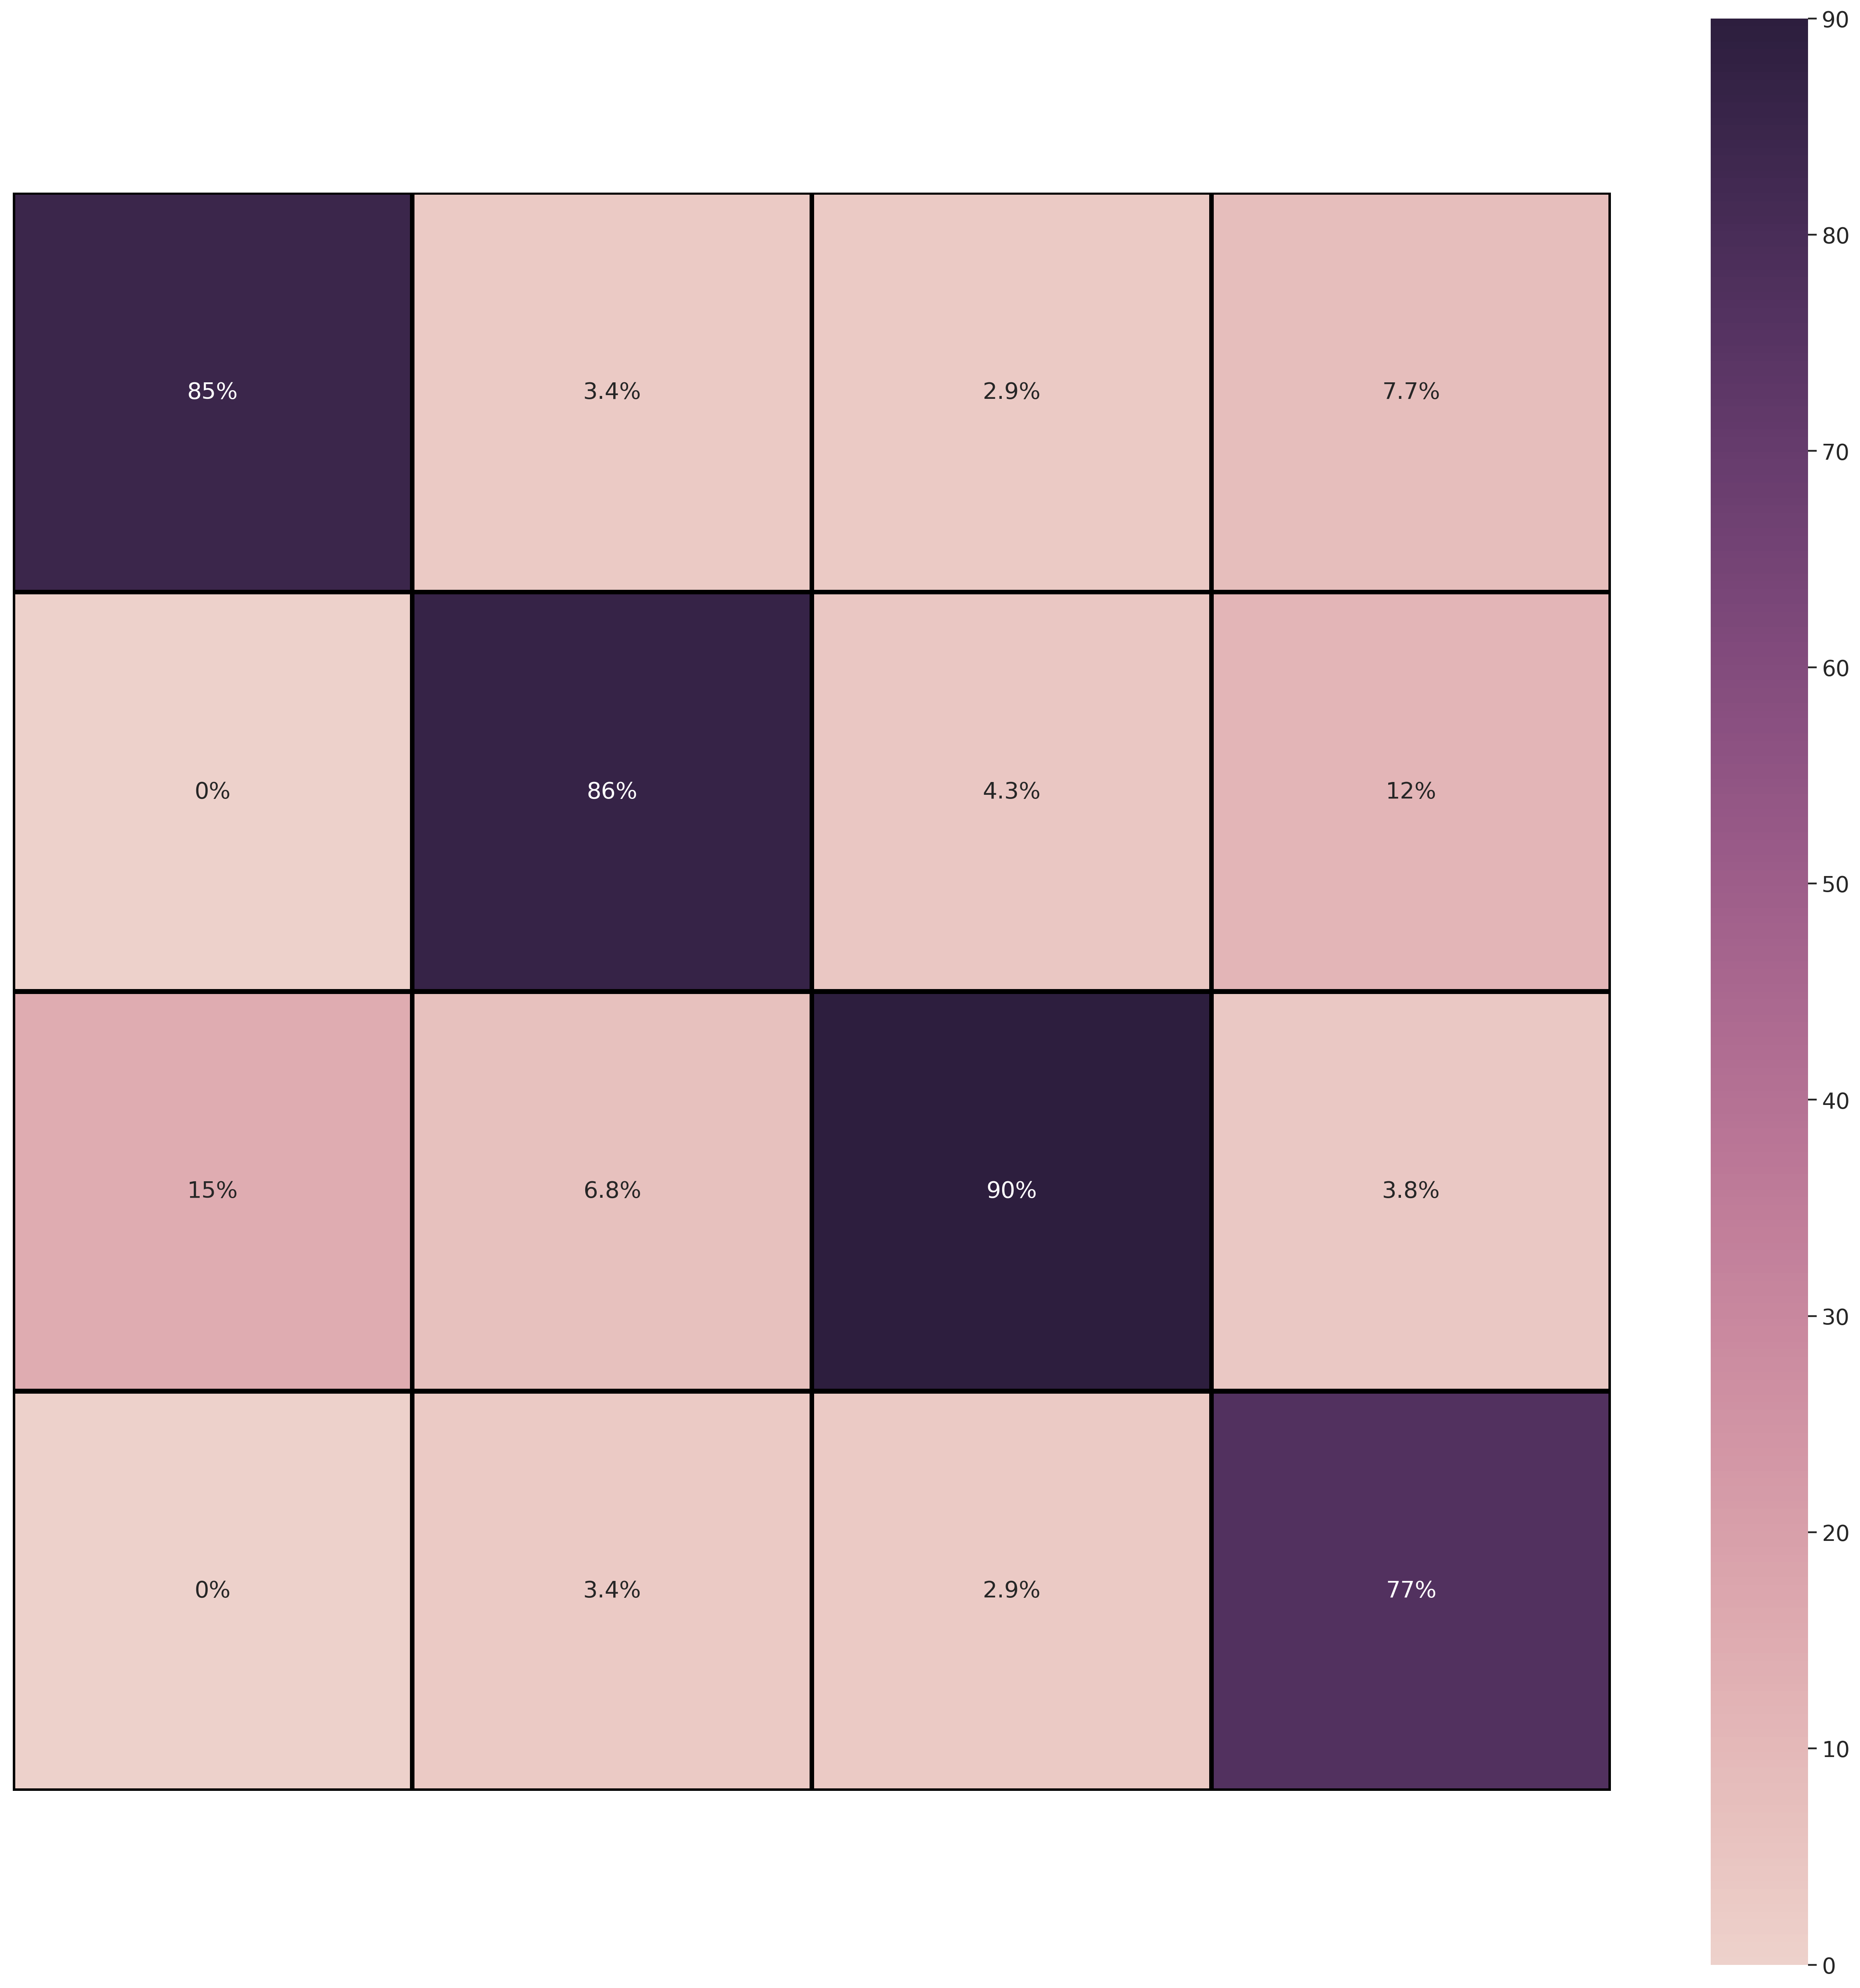

In [23]:
getConfusionMatrixPic()

In [ ]:
!~/gdrive-linux-x64 upload -r --parent 1vhs7zre7sOnRuWLeVT_sL7SMQpfFnrkx ~/pench/confused-pics/